## **Setup the Workspace**

In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
tf.__version__

'2.16.1'

## **Data Preprocessing**

### Grab some Images to Identify The Pattern

In [7]:
from PIL import Image

im = Image.open("D:/My Wish/Collage Data/Semester 6/Analisis Big Data/Tugas Besar/Sign-Hand-to-Text-Pipeline/Data/Train/A/0.jpg")
print(im.format, im.size, im.mode) # Read Format, Size and Mode

JPEG (310, 310) L


### Generating images for the Training Dataset

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

### Generating Images for The Test Dataset 

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Creating the Training Set (Reader File)

In [14]:
training_set = train_datagen.flow_from_directory('../Data/Train', 
                                                target_size=(128, 128),
                                                batch_size = 10, 
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


### Creating the Test Set (Reader File)

In [15]:
testing_set = test_datagen.flow_from_directory('../Data/Test', 
                                                target_size=(128, 128),
                                                batch_size = 10, 
                                                color_mode = 'grayscale',
                                                class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


## **Building CNN**

### Inisialization CNN 

In [16]:
classifier = tf.keras.models.Sequential()

### Convolution Layer

In [19]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=3,
                                    padding="same",
                                    activation="relu",
                                    input_shape=(128, 128, 1)))

### Pooling Layer

In [20]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                        strides=2,
                                        padding='valid'))

### Adding a second Convolutional Layer

In [21]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                    kernel_size=3, 
                                    padding="same",
                                    activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=3,
                                        strides=2,
                                        padding="valid"))

### Flattening

In [23]:
classifier.add(tf.keras.layers.Flatten())

### Fully Connected Layer

In [25]:
classifier.add(tf.keras.layers.Dense(units=128,activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.50))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.50))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax'))

## **Training CNN**

### Compiling the CNN Models

In [26]:
classifier.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

### Summary The Models

In [27]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,966,299 (15.13 MB)

 Trainable params: 3,966,299 (15.13 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = classifier.fit(training_set,
                epochs=5,
                validation_data = testing_set)

Epoch 1/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 155s 121ms/step - accuracy: 0.7981 - loss: 0.6075 - val_accuracy: 0.9918 - val_loss: 0.0553
Epoch 2/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 123s 95ms/step - accuracy: 0.8229 - loss: 0.5324 - val_accuracy: 0.9834 - val_loss: 0.0833
Epoch 3/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.8312 - loss: 0.5151 - val_accuracy: 0.9932 - val_loss: 0.0378
Epoch 4/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 138s 107ms/step - accuracy: 0.8444 - loss: 0.4735 - val_accuracy: 0.9941 - val_loss: 0.0322
Epoch 5/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 126s 98ms/step - accuracy: 0.8569 - loss: 0.4282 - val_accuracy: 0.9934 - val_loss: 0.0226


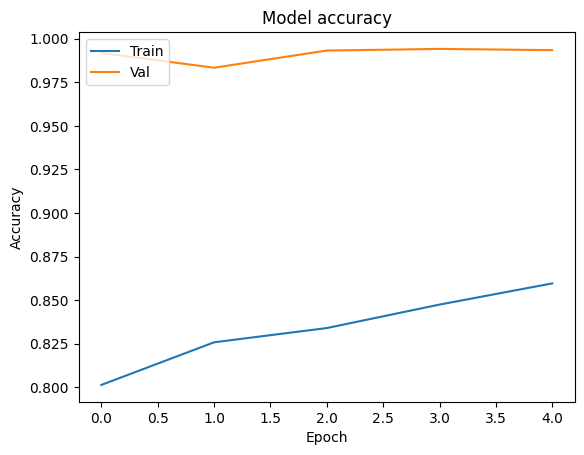

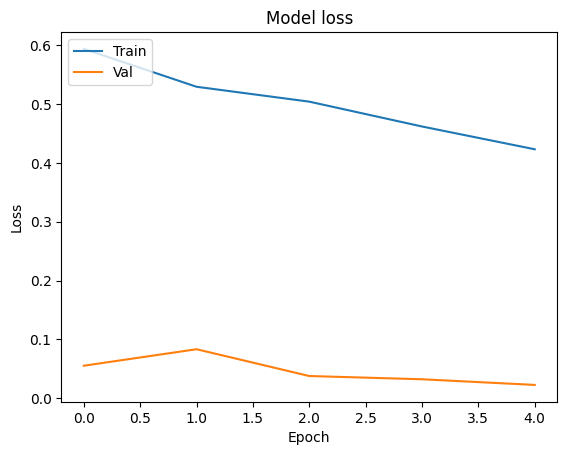

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **Saving Models**

In [37]:
# Simpan arsitektur model ke dalam file JSON
model_json = classifier.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print("Model architecture saved")

# Simpan model dan bobotnya
classifier.save("model_new.h5")
print("Model and weights saved")

Model architecture saved
Model and weights saved


: 